In [1]:
#import modules
import pandas as pd
import os
import matplotlib.pyplot as plt

## Explore the Data

The first step in any project is to explore the data. This may require some work to detect and fix issues in the data (such as dealing with missing values, errors, or outlier values).

Let's start by loading the data as a **Pandas** DataFrame and viewing the first few rows.

In [2]:
city_data = pd.read_csv("data/city_data.csv")
city_list = pd.read_csv("data/city_list.csv")
global_data = pd.read_csv("data/global_data.csv")

In [3]:
city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [4]:
city_data.tail()

,year,city,country,avg_temp
70787,2009,Zapopan,Mexico,21.76
70788,2010,Zapopan,Mexico,20.90
70789,2011,Zapopan,Mexico,21.55
70790,2012,Zapopan,Mexico,21.52
70791,2013,Zapopan,Mexico,22.19


In [5]:
cities = len(city_data["city"].unique())
countries = len(city_data["country"].unique())
avg_temperatures = len(city_data["avg_temp"])

print("Number of unique cities: ", cities)
print("Number of unique countries: ", countries)
print("Number of average temperatures: ", avg_temperatures)

Number of unique cities:  329
Number of unique countries:  135
Number of average temperatures:  70792


The city_data consists of the following columns:

- **year**: years from 1849-2013
- **city**: 329 cities
- **country**: 135 countries
- **avg_temp**: 70792 values of average temperature

In [6]:
#check out first 5 rows of city_list
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [7]:
print(len(city_list["city"].unique()))
print("Shape of city list ", city_list.shape)
#-->here you can see that some cities seem to be duplicated, let us check that

329
Shape of city list  (342, 2)


In [8]:
city_list.loc[city_list["city"].duplicated(keep = False)]

,city,country
9,Alexandria,Egypt
10,Alexandria,United States
33,Barcelona,Spain
34,Barcelona,Venezuela
45,Birmingham,United Kingdom
46,Birmingham,United States
71,Colombo,Brazil
72,Colombo,Sri Lanka
125,Hyderabad,India
126,Hyderabad,Pakistan


yap, dupliacted city names!

In [9]:
print("Number of unique countries: ", len(city_list["country"].unique()))

Number of unique countries:  135


The city_list consists of the following columns:

- **city**: 342 cities out of which some have the same name
- **country**: 135 countries


In [10]:
#check out first 5 rows of global_data
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [11]:
#check out last 5 rows of global_data
global_data.tail()

,year,avg_temp
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57
265,2015,9.83


In [12]:
#exctract city data for the closest big city where I live
city_list.loc[city_list["country"] == "Germany"]["city"].unique()
city_list.loc[city_list["city"] == "Hamburg"]

#define df with home city
df_home = city_data.loc[city_data["city"] == "Hamburg"]

In [13]:
print(global_data.shape)
print(df_home.shape)
#dfs do not have the same number of years! Let us confirm

(266, 2)
(271, 4)


In [14]:
print(df_home["year"].min(), df_home["year"].max())
print(global_data["year"].min(), global_data["year"].max())
#Yes, Hamburg starts 7 years earlier and ends 2 years earlier

1743 2013
1750 2015


In [15]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [16]:
global_data.tail()

,year,avg_temp
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57
265,2015,9.83


In [17]:
#calculate moving averages
global_data['avg_temp_rolling'] = global_data["avg_temp"].rolling(10, min_periods=1).mean()

#calculate moving averages
df_home['avg_temp_rolling'] = df_home["avg_temp"].rolling(10, min_periods=1).mean()

<ipython-input-17-e8c2f57d90d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home['avg_temp_rolling'] = df_home["avg_temp"].rolling(10, min_periods=1).mean()


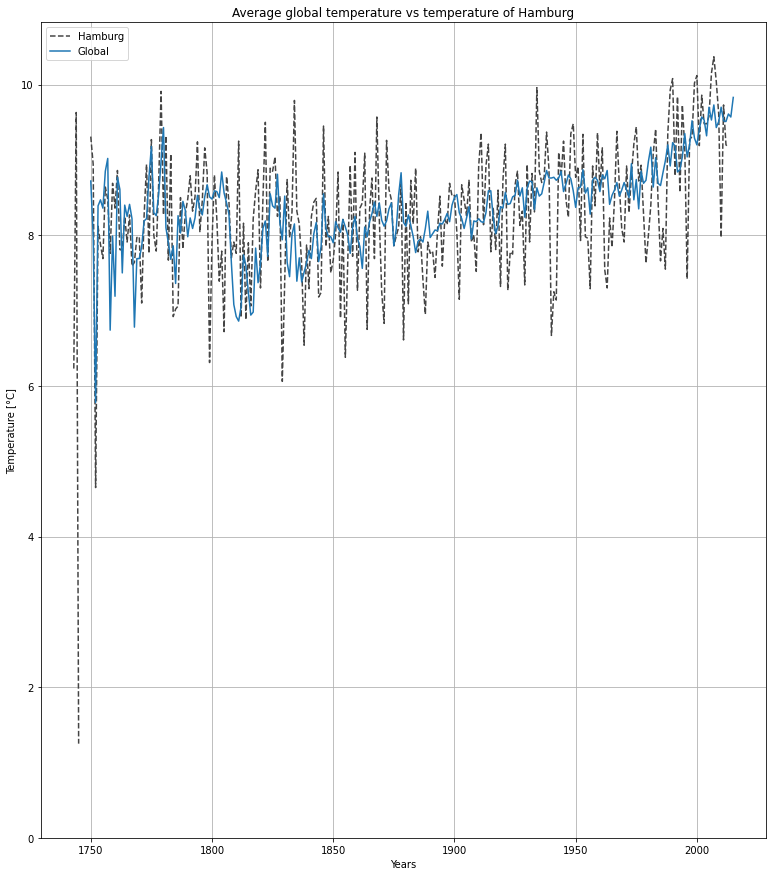

In [18]:
#plot the data

avg_temp_1 = df_home["avg_temp"]
avg_temp_2 = global_data["avg_temp"]
years = df_home["year"]
years_2 = global_data["year"]

#years = city_data.loc[city_data["city"] == "Hamburg"]["year"]


fig1, ax1 = plt.subplots()
fig1.set_figheight(15)
fig1.set_figwidth(13)

ax1.plot(years, avg_temp_1, color='#444444', linestyle='--', label='Hamburg')
ax1.plot(years_2, avg_temp_2, label = "Global")


ax1.legend()
ax1.set_title('Average global temperature vs temperature of Hamburg')
ax1.set_ylabel('Temperature [°C]')
ax1.set_xlabel('Years')
ax1.set_ylim(ymin=0)

plt.legend()

#plt.savefig("plot.png")

plt.grid(True)

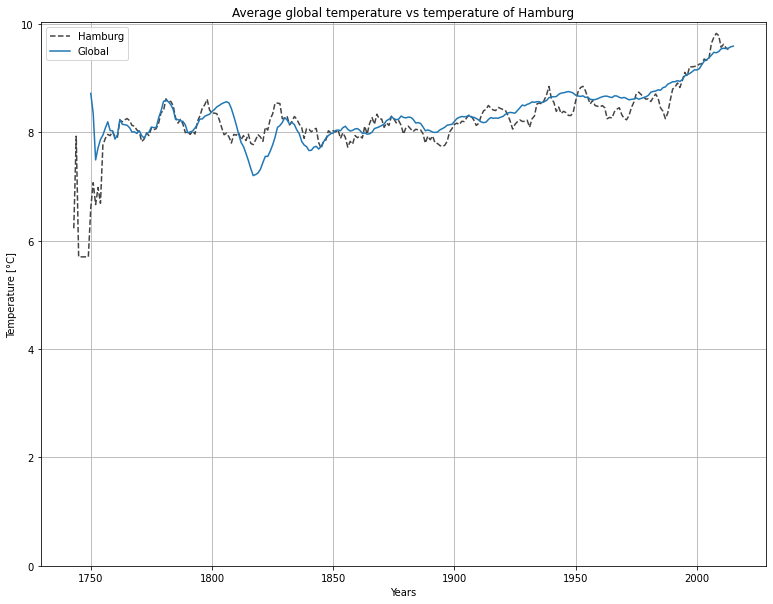

In [19]:
#plot the data rolling mean

avg_temp_1 = df_home["avg_temp_rolling"]
avg_temp_2 = global_data["avg_temp_rolling"]
years = df_home["year"]
years_2 = global_data["year"]

#years = city_data.loc[city_data["city"] == "Hamburg"]["year"]


fig1, ax1 = plt.subplots()
fig1.set_figheight(10)
fig1.set_figwidth(13)

ax1.plot(years, avg_temp_1, color='#444444', linestyle='--', label='Hamburg')
ax1.plot(years_2, avg_temp_2, label = "Global")


ax1.legend()
ax1.set_title('Average global temperature vs temperature of Hamburg')
ax1.set_ylabel('Temperature [°C]')
ax1.set_xlabel('Years')
ax1.set_ylim(ymin=0)

plt.legend()

#plt.savefig("plot.png")

plt.grid(True)




In [20]:
import seaborn as sns

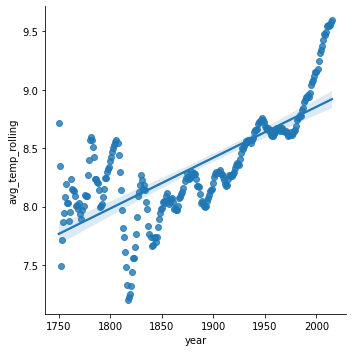

In [21]:
sns.lmplot(x='year',y='avg_temp_rolling',data=global_data)

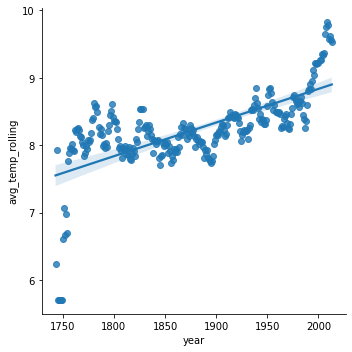

In [22]:
sns.lmplot(x='year',y='avg_temp_rolling',data=df_home)

# Observations

* observable upward trend for both Hamburg and global temperature
* for both Hamburg and globally, there are periods of temperature dips / periods of colder years. Nevertheless, there is clear upward trend 
* the upward trend seems to become steeper around 1980
* there is a high correlation between Hamburgs- and the global temperature
* the temperature of Hamburg almost corresponds to the global temperature